In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import sklearn 

#importing Dataset

In [3]:
dataset = pd.read_csv('50_Startups.csv')

In [5]:
dataset.head(),dataset.tail()

(   R&D Spend  Administration  Marketing Spend     Profit
 0  165349.20       136897.80        471784.10  192261.83
 1  162597.70       151377.59        443898.53  191792.06
 2  153441.51       101145.55        407934.54  191050.39
 3  144372.41       118671.85        383199.62  182901.99
 4  142107.34        91391.77        366168.42  166187.94,
     R&D Spend  Administration  Marketing Spend    Profit
 45    1000.23       124153.04          1903.93  64926.08
 46    1315.46       115816.21        297114.46  49490.75
 47       0.00       135426.92             0.00  42559.73
 48     542.05        51743.15             0.00  35673.41
 49       0.00       116983.80         45173.06  14681.40)

In [7]:
print('rows :',dataset.shape[0])
print('columns :',dataset.shape[1])

rows : 50
columns : 4


In [8]:
#checking for repeated values in dataset
dataset.duplicated().sum()

0

In [9]:
#checking for null values in dataset
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [10]:
#dataset schema
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
#corr function
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
c = dataset.corr()

In [13]:
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


correlation matrix

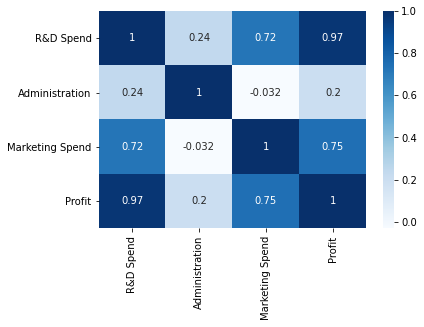

In [14]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

Outliers detection in the target variable

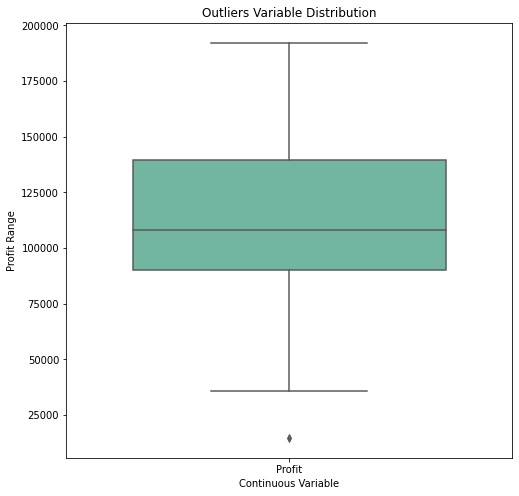

In [15]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

c:\users\91755\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


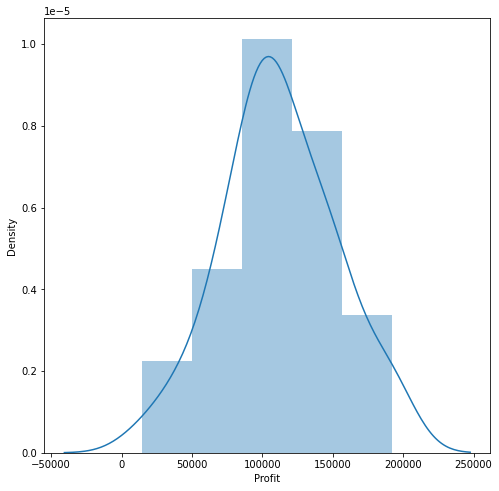

In [18]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

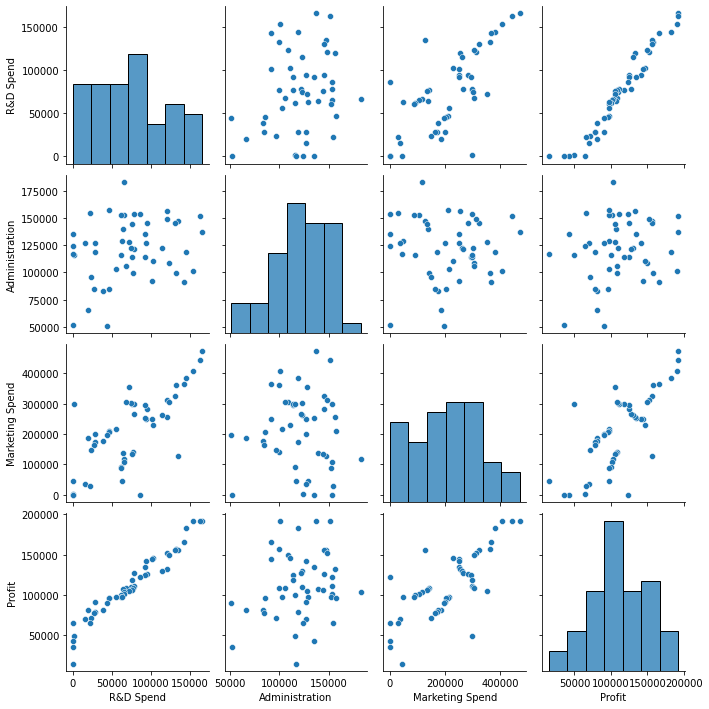

<Figure size 360x360 with 0 Axes>

In [19]:
sns.pairplot(dataset)
plt.figure(figsize=(5,5))
plt.show()

# model preparation

In [21]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


# split the data into training and testing data

In [27]:
split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train


array([[1.3029813e+05, 1.4553006e+05, 4.0000000e+01],
       [1.1994324e+05, 1.5654742e+05, 2.8000000e+01],
       [1.0002300e+03, 1.2415304e+05, 1.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 8.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.9000000e+01],
       [6.1994480e+04, 1.1564128e+05, 7.0000000e+00],
       [6.3408860e+04, 1.2921961e+05, 5.0000000e+00],
       [7.8013110e+04, 1.2159755e+05, 3.0000000e+01],
       [2.3640930e+04, 9.6189630e+04, 1.4000000e+01],
       [7.6253860e+04, 1.1386730e+05, 3.4000000e+01],
       [1.5505730e+04, 1.2738230e+05, 3.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.9000000e+01],
       [9.1992390e+04, 1.3549507e+05, 2.7000000e+01],
       [6.4664710e+04, 1.3955316e+05, 1.2000000e+01],
       [1.3187690e+05, 9.9814710e+04, 4.2000000e+01],
       [9.4657160e+04, 1.4507758e+05, 3.1000000e+01],
       [2.8754330e+04, 1.1854605e+05, 1.6000000e+01],
       [0.0000000e+00, 1.169

In [30]:
# Feature Scaling -- Useful when Features have different units

"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)\ny_test = sc_y.fit_transform(y_test)'

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [32]:
y_pred = model.predict(x_test)
y_pred

array([103365.65430448, 132409.63159464, 133669.58924177,  71596.33493623,
       179574.8809234 , 114195.96899299,  65656.85292429,  97938.81018901,
       114412.29898539, 169772.36831918,  96050.9051499 ,  87515.25731045,
       110242.6075272 ,  90000.89195708, 127479.23515393])

In [33]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848


In [34]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,103365.654304,103282.38
1,132409.631595,144259.40
2,133669.589242,146121.95
3,71596.334936,77798.83
4,179574.880923,191050.39
5,114195.968993,105008.31
6,65656.852924,81229.06
7,97938.810189,97483.56
8,114412.298985,110352.25
9,169772.368319,166187.94


# regression metrics

R2 score

In [35]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.21346390789374


mean squared error

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6524519362.317416


root Mean squared Error

In [37]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  807744.9697966195


Mean absolute Error

In [38]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6603.238628961085
